# Visualize L1 and L2 regularization

In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## L2

In [375]:
def plot_reg(penalty:('l1','l2')='l2',lmbda:float=1.0,show_reg=True,yrange=(0,17.5)):
    mse_color = '#225ea8'
    reg_color = '#fdae61'
    sum_color = '#41b6c4'
    fig, ax = plt.subplots(1,1)
    b1 = np.linspace(0,4,1000)
    mse = (b1-3)**2
    if penalty=='l1':
        reg = lmbda * np.abs(b1)
    else:
        reg = lmbda * b1**2
    min_mse = np.min(mse)
    min_mse_x = b1[np.argmin(mse)]
    min_loss = np.min(mse+reg)
    min_loss_x = b1[np.argmin(mse+reg)]
    ax.plot(b1, mse, lw=.75, label="mse", c=mse_color)
    if show_reg:
        ax.plot(b1, reg, lw=.3, label="reg", c=reg_color)
        ax.plot(b1, mse + reg, '--', lw=1, label="mse+reg", c=sum_color)
        ax.annotate("Min mse+reg",(min_loss_x,min_loss),xytext=(min_loss_x,min_loss+3),
                    arrowprops=dict(arrowstyle="->"), horizontalalignment='right')
        ax.plot([min_loss_x,min_loss_x], [0,yrange[1]],lw=.5,c='grey')
        ax.fill_between(b1, reg, 0, color=reg_color, alpha=.15)
        ax.text(2,16,f"$\\lambda={lmbda:.1f}$ ({penalty.upper()})",
               horizontalalignment='center')
        ax.text(2,15,f"shifts min loss",
               horizontalalignment='center')
        if not np.isclose(min_loss_x,min_mse_x):
            ax.arrow(min_mse_x, yrange[1]-1.7, (min_loss_x-min_mse_x), 0, lw=.5, 
                    head_length=0.05,
                    head_width=0.2,
                    length_includes_head=True)
    ax.plot([min_mse_x,min_mse_x], [0,yrange[1]],lw=.5,c='grey')
    ax.annotate("Min mse",(3,0),xytext=(3.2,3),arrowprops=dict(arrowstyle="->"))
    ax.set_xlabel("$\\beta_1$")
    ax.set_ylabel("Loss")
    ax.set_ylim(*yrange)
    ax.legend(loc='upper left')

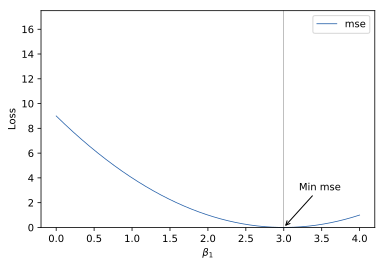

In [346]:
plot_reg('l2',show_reg=False)

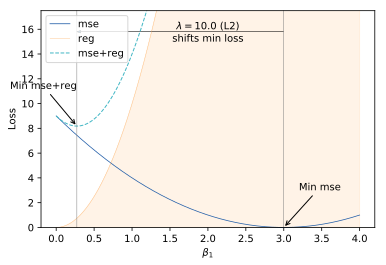

In [384]:
plot_reg('l2',lmbda=10)

## L1

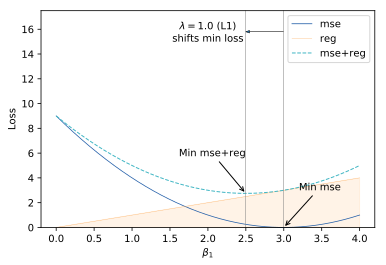

In [348]:
plot_reg('l1',lmbda=1.0)

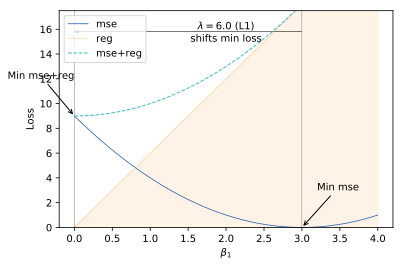

In [387]:
plot_reg('l1',lmbda=6)

## Animate

In [373]:
import glob
import os
from PIL import Image as PIL_Image

def animate(penalty, lrange, step):
    plt.close()
    for f in glob.glob(f'/tmp/{penalty}-frame-*.png'):
        os.remove(f)

    for lmbda in np.arange(*lrange,step):
        plot_reg(penalty,lmbda=lmbda)
        plt.savefig(f"/tmp/{penalty}-frame-{lmbda:.1f}.png", bbox_inches=0, pad_inches=0, dpi=200)
        plt.close()

    images = [PIL_Image.open(image) for image in sorted(glob.glob(f'/tmp/{penalty}-frame-*.png'))]
    images += reversed(images)
    images[0].save(f'/tmp/{penalty}-animation.gif',
                   save_all=True,
                   append_images=images[1:],
                   duration=70,
                   loop=0)

In [376]:
animate('l1',lrange=(0.0,4), step=.025)

In [377]:
animate('l2',lrange=(0.0,1.3), step=.025)